'''
## Machine Learning from scrach
### Example 4: Logistic Regression

@Author _ Nikesh Bajaj
PhD Student at Queen Mary University of London &
University of Genova
Conact _ http://nikeshbajaj.in 
n[dot]bajaj@qmul.ac.uk
bajaj[dot]nikkey@gmail.com
'''

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import DataSet as ds
from LogisticRegression import LR

In [2]:
%matplotlib notebook

(2, 500) (1, 500)


<IPython.core.display.Javascript object>


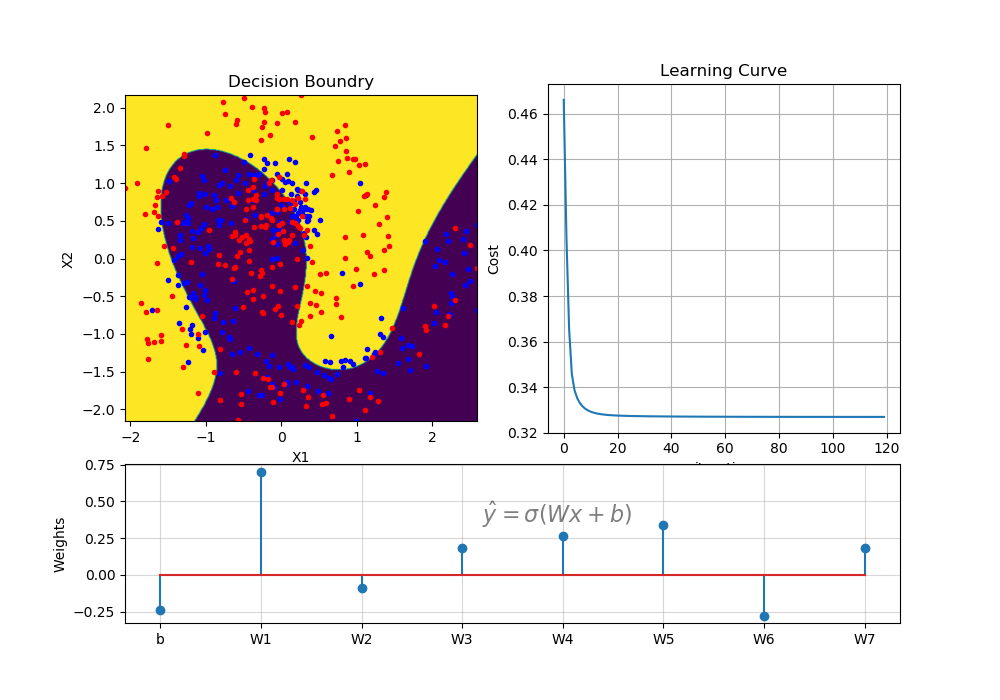

Accuracy::: Training : 56.4


In [9]:
plt.close('all')

dtype = ['MOONS','GAUSSIANS','LINEAR','SINUSOIDAL','SPIRAL']

#X, y,_ = ds.create_dataset(200, dtype[2],0.05,varargin = 'PRESET')

X, y,_ = ds.create_dataset(500, dtype[4],0.05,varargin = 'PRESET')

#Xts, yts,_ = ds.create_dataset(200, dtype[1],0.0,varargin = 'PRESET');
#X=X.T
#y = y.T

print(X.shape, y.shape)

means = np.mean(X,1).reshape(X.shape[0],-1)
stds  = np.std(X,1).reshape(X.shape[0],-1)

X = (X-means)/stds


Clf = LR(X,y,alpha=0.001,polyfit=True,degree=3,lambd=0)


delay=0.01
fig=plt.figure(figsize=(10,7))
gs=GridSpec(3,2)
ax1=fig.add_subplot(gs[0:2,0])
ax2=fig.add_subplot(gs[0:2,1])
ax3=fig.add_subplot(gs[2,:])

for i in range(60):
    Clf.fit(X,y,itr=2,verbose=False)
    ax1.clear()
    Clf.Bplot(ax1,hardbound=True)
    ax2.clear()
    Clf.LCurvePlot(ax2)
    ax3.clear()
    Clf.Wplot(ax3)
    fig.canvas.draw()
    time.sleep(delay)
    #W,b =Clf.getWeights()
    #print(W,b)
    fig.savefig('p'+str(i)+'.png',dpi=200)
    
yprob,yp = Clf.predict(X)
print('Accuracy::: Training :',100*np.sum(yp==y)/yp.shape[1])